## Introduction
In this project, a number of data mining techniques to extract interesting patterns from the data set will be applied and the performance of the models will be evaluated. The dataset is the Census Income dataset, which can be accessed at https://archive.ics.edu/dataset/20/census+income.

## Goal
The goal is to build a model to predict income levels using the classification and to reveal segments of the population with similar charactersitics using the clustering technique.

# Data
The modified dataset consists of approximately 32561 data points, with each data point having 15 features.

Target variable: income (<=50K, >50K)

# 1 Preliminary Data Analysis

## 1.1 Importing the libraries

In [2]:
#importing and pre-processing data
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

#visualizing data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#training data 
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


#checking models accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## 1.2 Dataset

In [3]:
df=pd.read_csv("census_2.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. We observe that education-num and education are the same variables with different data types. We can drop one of them.
2. We have categorical and numerical values.

## 1.3 Columns & their Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [63]:
df.shape()

TypeError: 'tuple' object is not callable

We need to convert all variables to the same datatype for classification.


## Summary Statistics

In [5]:
for i in df.columns:
    print(i,":\n", df[i].unique())

age :
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass :
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt :
 [ 77516  83311 215646 ...  34066  84661 257302]
education :
 [' Bachelors' ' HS-grad' '11th' ' Masters' '9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' '7th-8th' ' Doctorate' ' Prof-school'
 '5th-6th' '10th' '1st-4th' ' Preschool' '12th']
education-num :
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status :
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation :
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishin

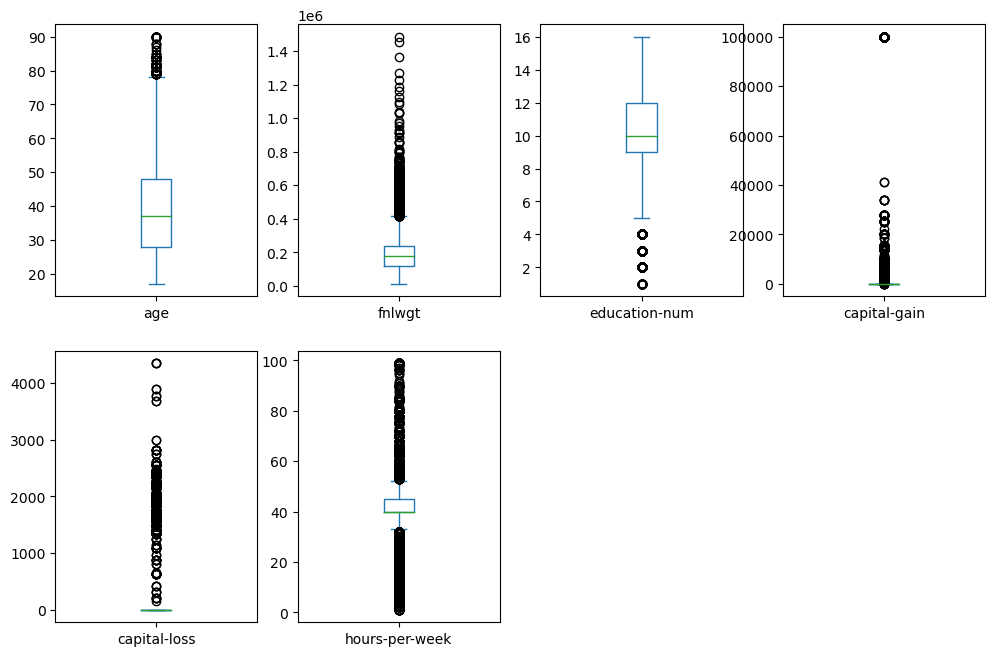

In [6]:
df.plot(kind='box', figsize=(12,12), layout=(3,4), sharex=False, subplots=True);

1. There is no missing data as all counts are the same.
2. There is presence of outliers in the data set in various columns.
3. The data has skewness too.

## 1.4 Distinct column values


In [7]:
for i in df.columns:
    print(i, "\n", df[i].unique())

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302]
education 
 [' Bachelors' ' HS-grad' '11th' ' Masters' '9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' '7th-8th' ' Doctorate' ' Prof-school'
 '5th-6th' '10th' '1st-4th' ' Preschool' '12th']
education-num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Ma

We can observe that the 'workclass', 'occupation' & 'country' has '?' values which means 'none'.

## 1.4.1 Amount of wrong column values in the dataset

In [9]:
for i,j in zip(df.columns,(df.values.astype(str)=='?').sum(axis = 0)):
    if j >0:
        print(str(i) +': ' + str(j) + ' records')

## 1.4.2 Visualizing each column to fill in the correct values
### 1.4.2.1 Workclass

<AxesSubplot:xlabel='workclass', ylabel='Count'>

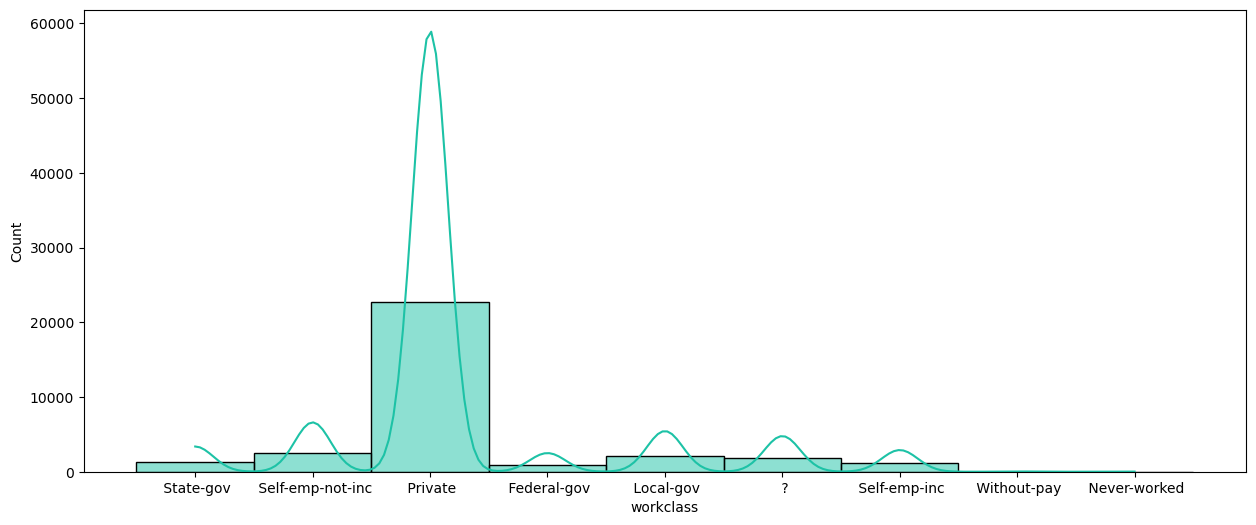

In [22]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['workclass'], x=df['workclass'], element="bars",kde=True, color="#1dc2a6")

1. The dominant values are only of 'Private Sector'.
2. ? does not have significant values or contribution to the dataset.

### 1.4.2.2 Country

/var/folders/qf/l0ftqjwj5rs69cfk915ms6s40000gn/T/ipykernel_56806/1351559041.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


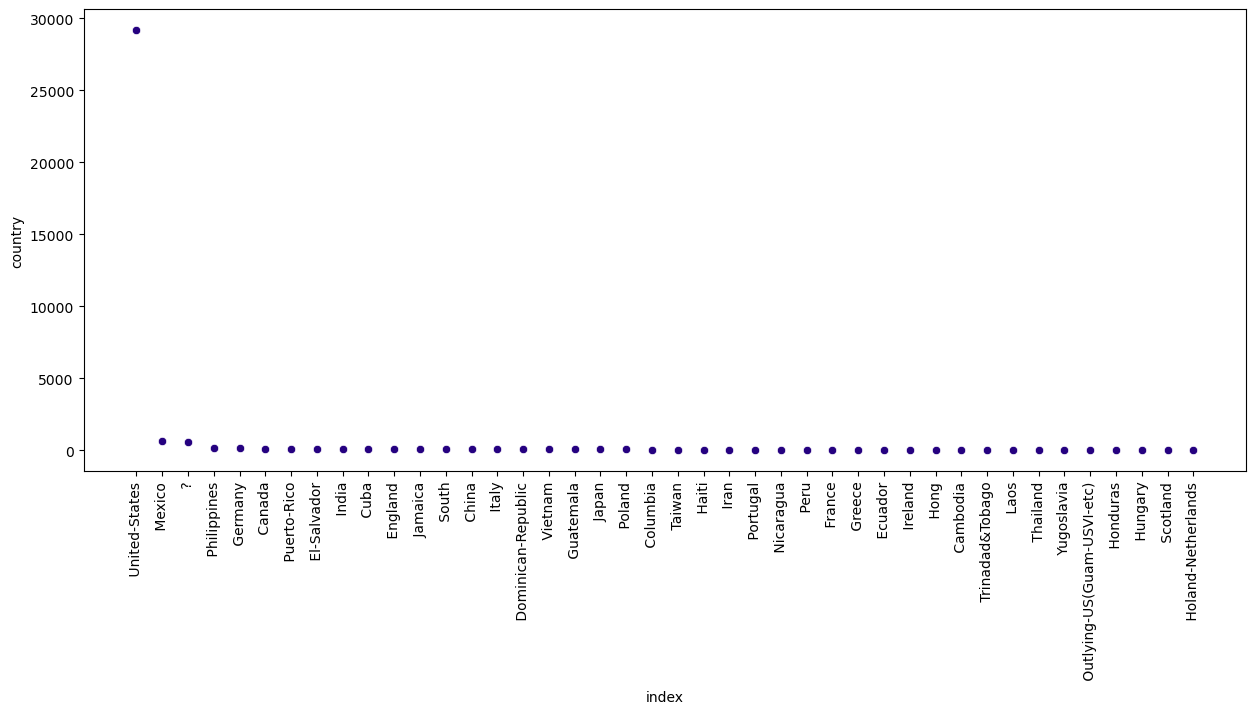

In [23]:
plt.figure(figsize=(15,6))
df_con=pd.DataFrame(data=df["country"].value_counts())
df_con=df_con.reset_index()
g=sns.scatterplot(data=df["country"], y=df_con["country"], x=df_con["index"],color="#250180")
g.set_xticklabels(
    labels=df_con["index"], rotation=90)
# Show the plot
plt.show()

1. The dominant values are only of United States. 

2. ? does not have significant values or contribution of the dataset.

### 1.4.2.3 Occupation

<AxesSubplot:xlabel='occupation', ylabel='index'>

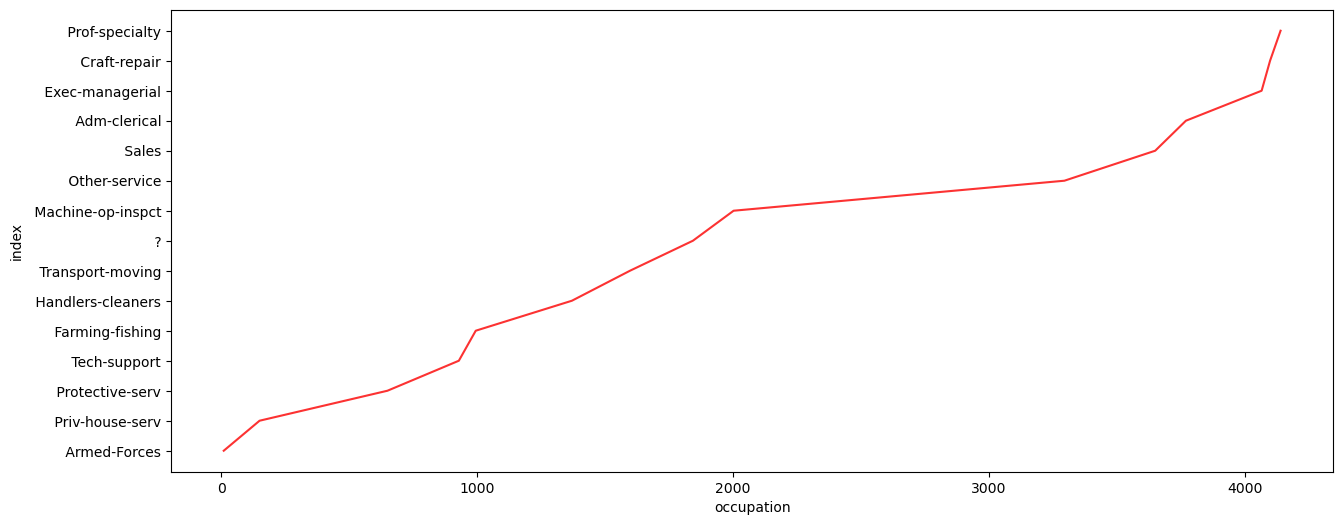

In [24]:
for i in ["occupation"]:
    plt.figure(figsize=(15,6))
    df_con=pd.DataFrame(data=df[i].value_counts())
    df_con=df_con.reset_index()
sns.lineplot(data=df_con["occupation"], x=df_con["occupation"], y=df_con["index"],color="#fc3232")

All the sectors have significant values therefore we need to distribute the ? values.

Replacing the ? values with the mode of the column.

<AxesSubplot:xlabel='occupation', ylabel='index'>

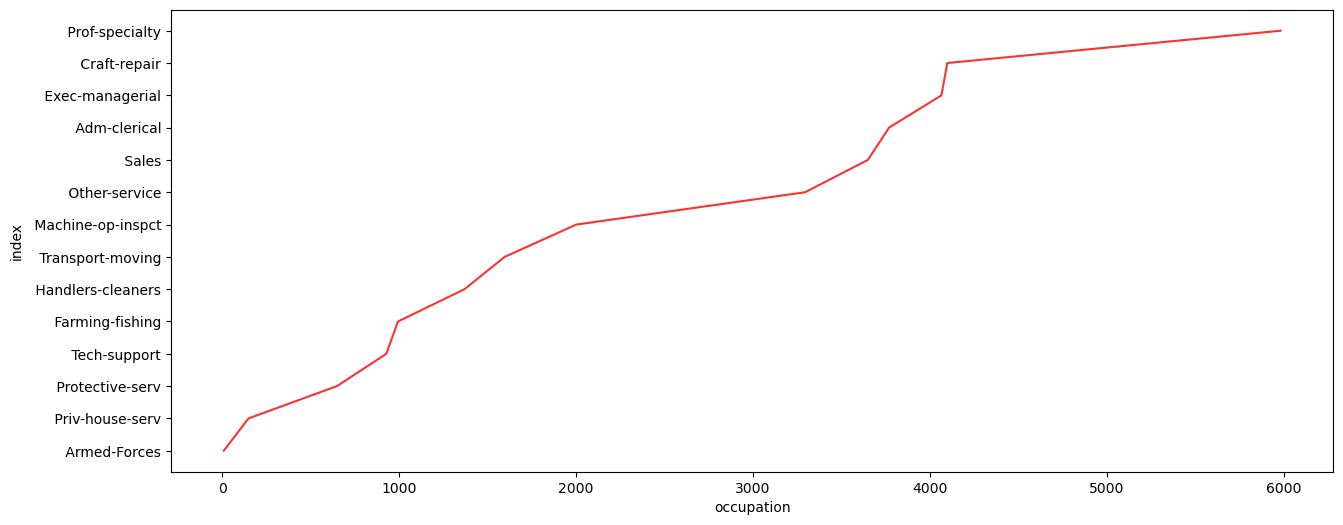

In [25]:
df["occupation"] = df["occupation"].replace(' ?', np.nan)
df["occupation"] = df["occupation"].fillna(df["occupation"].mode()[0])
for i in ["occupation"]:
    plt.figure(figsize=(15,6))
    df_con=pd.DataFrame(data=df[i].value_counts())
    df_con=df_con.reset_index()
sns.lineplot(data=df_con["occupation"], x=df_con["occupation"], y=df_con["index"],color="#fc3232")

The issue has been resolved and we get the clean dataset without any missing values

# 2. Exploratory Data Analysis
## 2.1 Visualizing left out categorical columns

### 2.2.1 Race

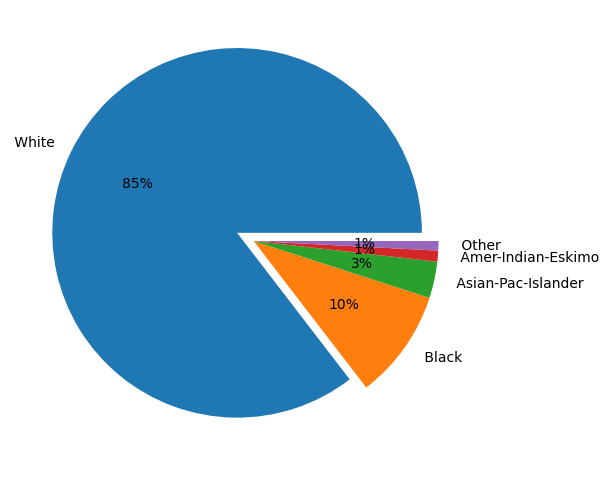

In [26]:
plt.figure(figsize=(10,6))
df_con=pd.DataFrame(data=df["race"].value_counts())
df_con=df_con.reset_index()
plt.pie(df_con["race"], labels=df_con["index"],explode=[0.1,0.0,0.0,0.0,0.0],autopct='%1.0f%%')
plt.show()

We infer the max race value is White therefore it can be grouped into white and non-whites.

### 2.1.2 Hours per week

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

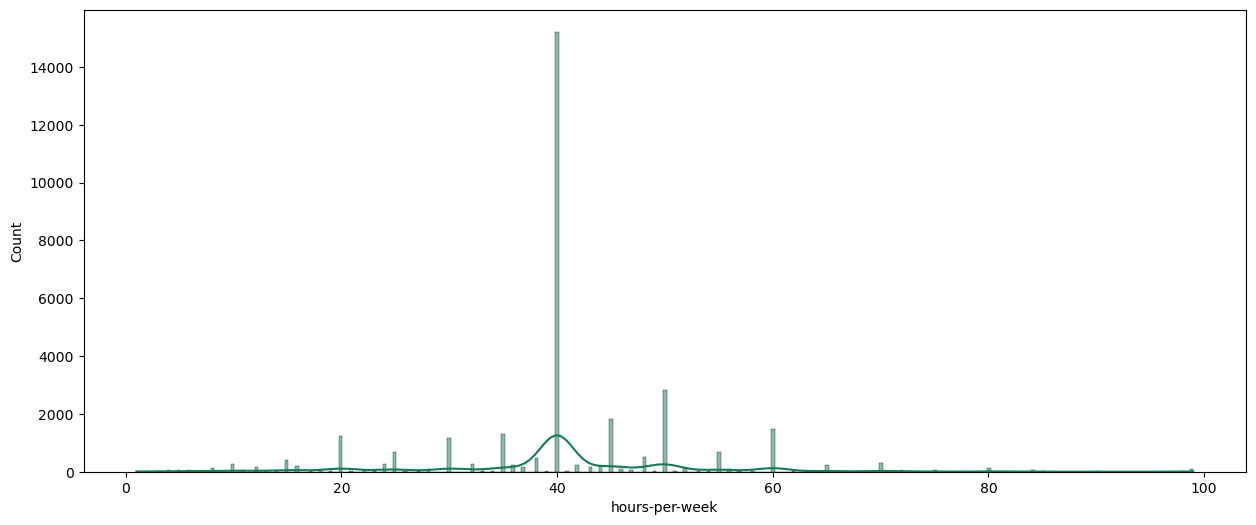

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(data=df['hours-per-week'], x=df['hours-per-week'], element="bars",kde=True, color="#0e7d5c")

We infer that the max hours-per-week value is 40 therefore it can be grouped into <=40 and >40.

Also from the above section we inferred that:
1. The max country value is United-States therefore it can be grouped into US & Non-US.
2. The max workclass value is Private therefore it can be grouped into Private & Non-Private.

## 2.2 Visualizing relationships of all columns with salary
### 2.2.1 Age & Salary

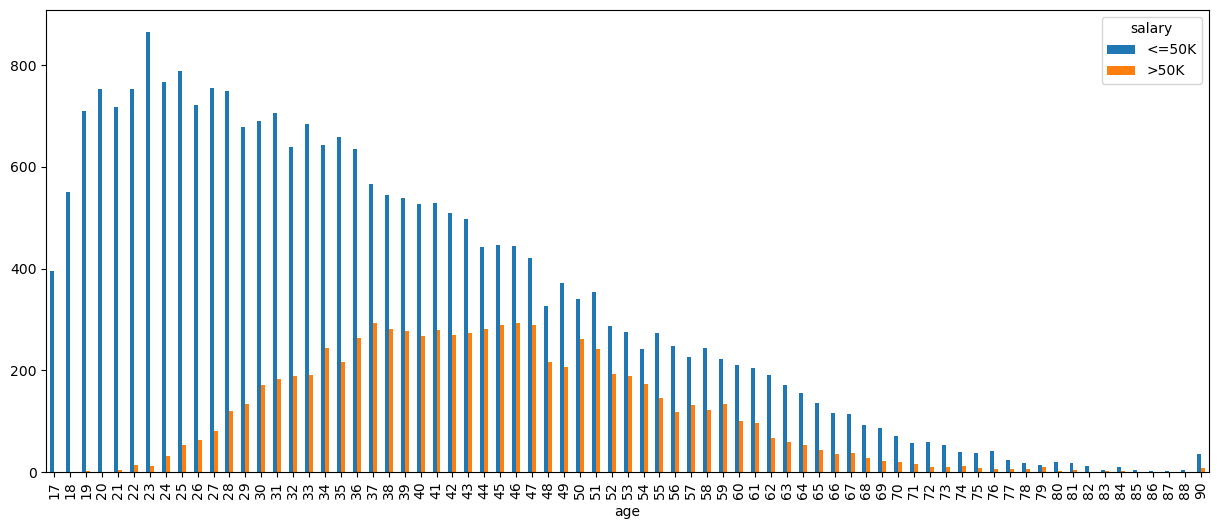

In [29]:
crosstb = pd.crosstab(df.age, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. We infer that min salary of most of the population is in their 20's which is valid as it is the starting time of a career.
2. Age and Salary are in direct proportion with each other.
3. The data is left skewed as there are a very few people who work after 60's, therefore the chances of salary being more than 50K is very less.


### 2.2.2 Workclass & Salary

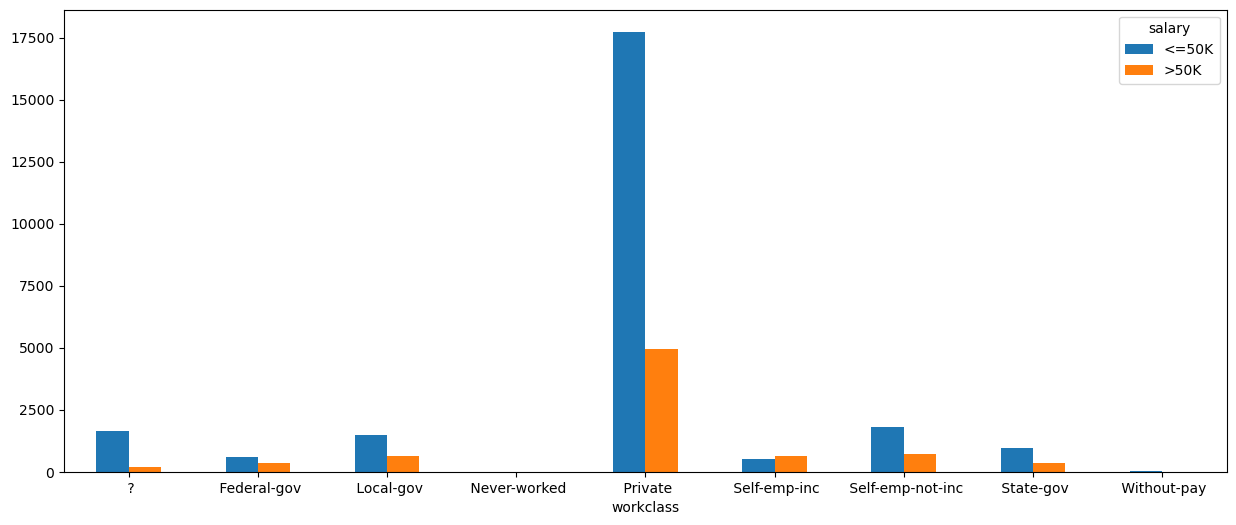

In [30]:
crosstb = pd.crosstab(df.workclass, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. We infer that salary of most of the population be it <= or > 50k is occupied by the Private sector.
2. Only a very few people belonging to private sector have a salary >50K, but it is still more than the sum total of all other sectors receiving salary >50k.
3. A self-employed person that is a businessman has slightly more chances of getting >50k.

### 2.2.3 Education & Salary

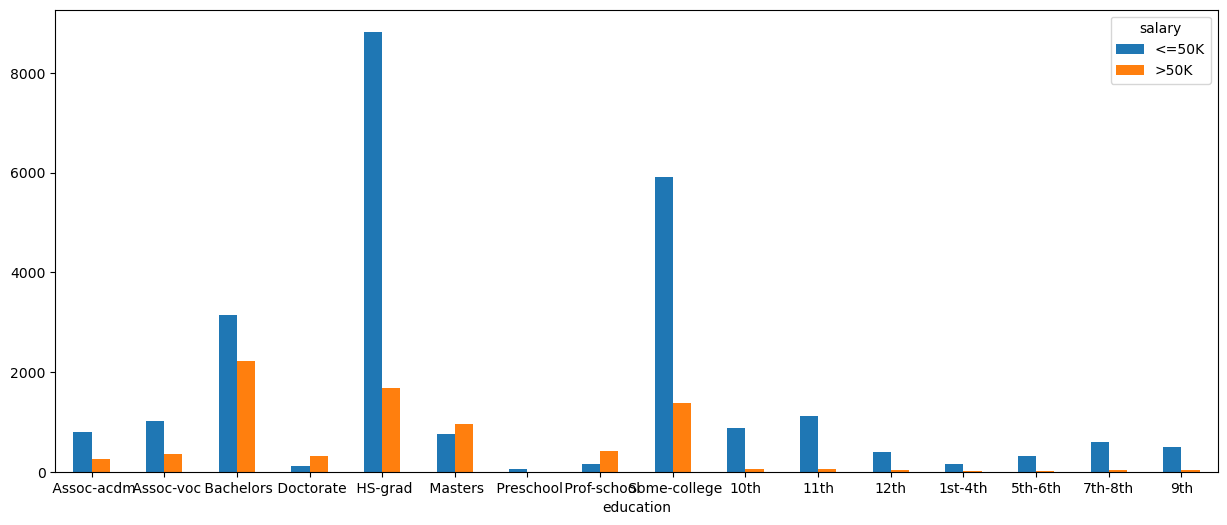

In [32]:
crosstb = pd.crosstab(df.education, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:
1. Bachelors: A person having a bachelors degree has 60:40 chances of getting <= or > 50k salary.
2. HS-grad: A person being a high school graduate has 95:05 chances of getting <= or >50k salary. As most of the population is concentrated in highschool passout this reflects that most of the people do not continue their studies after school.
3. Some-college: A person attended a college but has no degree is certainly likely to have 75:25 chances of getting <= or >50k salary. Surprisingly there are a good number of people in this category which is a huge liability to the country and the person itself as they're  not getting jobs according to their capabilities.

Another noticeable thing is that only a very few people complete their masters but one with that degree have a 45:55 chance of getting <= or >50k salary.


### 2.2.4 Marital Status & Salary

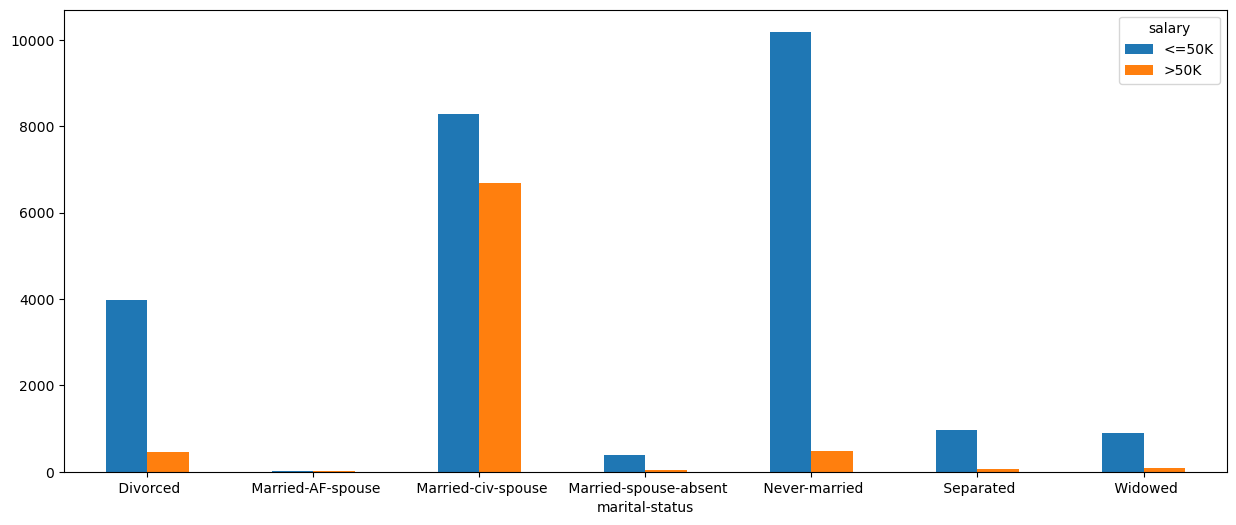

In [33]:
crosstb = pd.crosstab(df["marital-status"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

We infer that the population is broadly divided into three groups:

1. Divorced: A divorced person has 90:10 chances of getting <= or >50k salary.
2. Married-civ-spouse: A person married to a civilian spouse has 53:47 chances of getting <= or >50k salary. People in this domain are almost equal in number.
3. Never-married: A person who has never married has 95:05 chances of getting <= or >50k salary. Most of the population is concentrated in this domain. 


### 2.2.5 Occupation and Salary

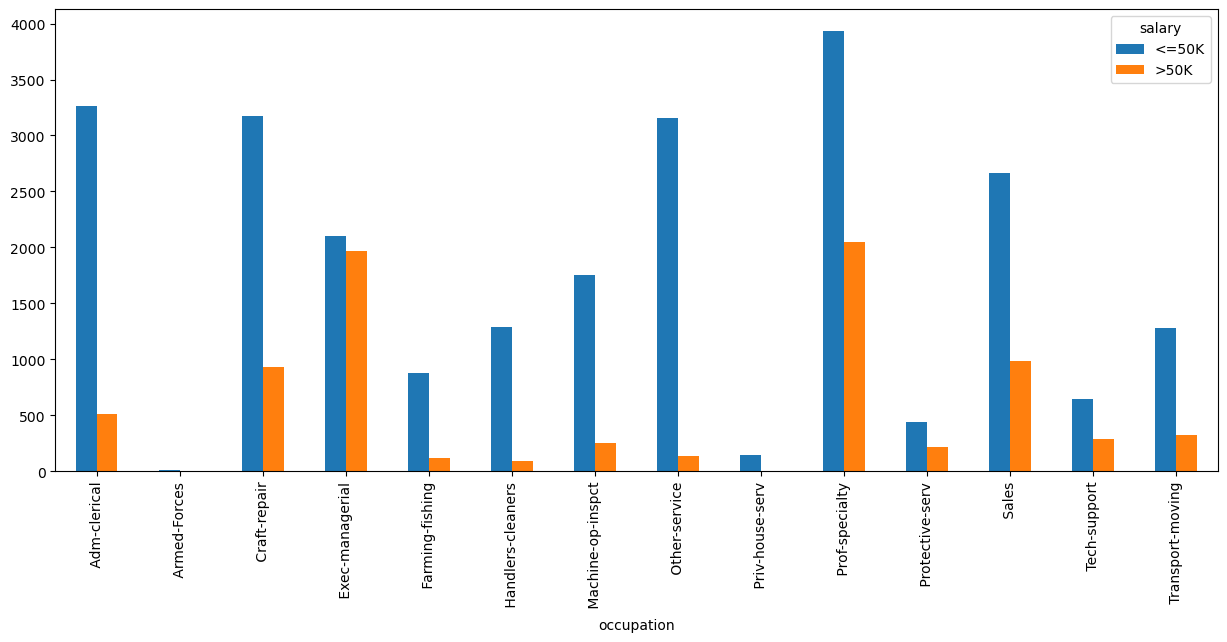

In [34]:
crosstb = pd.crosstab(df.occupation, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

1. Population  is distributed in all of the occupational fields with minimum in armed forces & maximum in prof-specialty.
2. Being in an executive managerial position gives almost equal chances of getting a <= or >50k salary.

### 2.2.6 Relationship & Salary

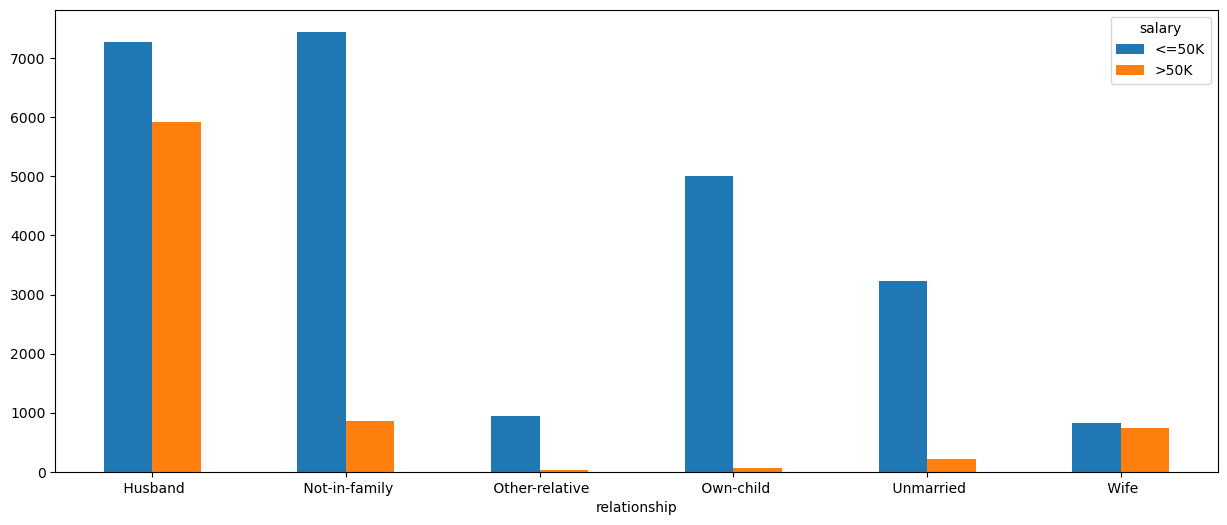

In [35]:
crosstb = pd.crosstab(df.relationship, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the people who are earning lie in the category of husbands. They have a 55:45 chances of getting <= or > 50k salary.
2. A person being an earning wife has equal chances of getting <= or >50k salary.


### 2.2.7 Race & Salary

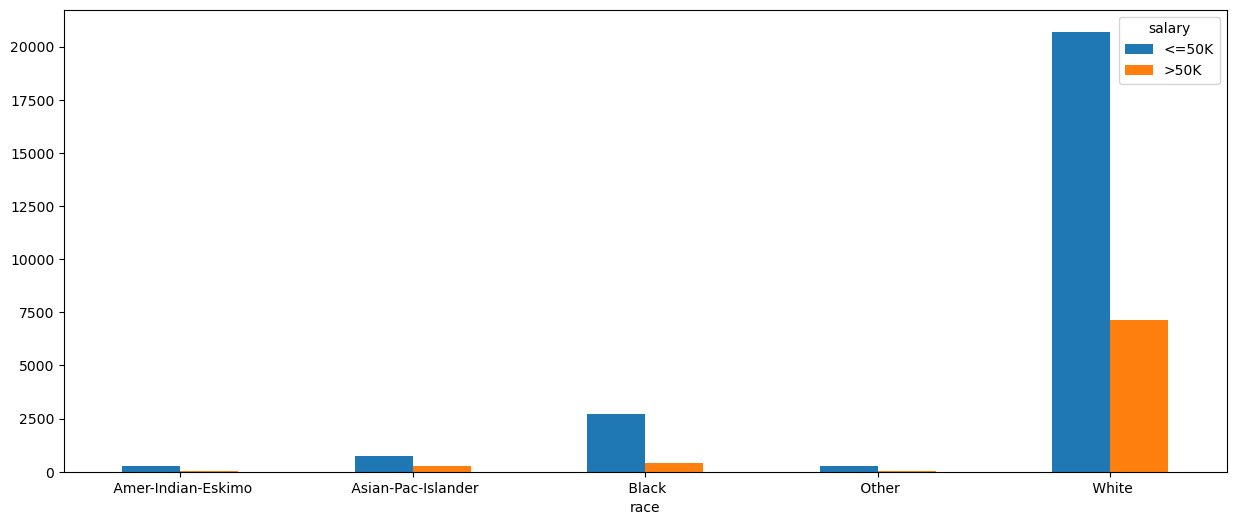

In [36]:
crosstb = pd.crosstab(df.race, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

Most of the population is white and has 75:25 chances of getting <= or >50k salary.

### 2.2 8 Gender & Salary

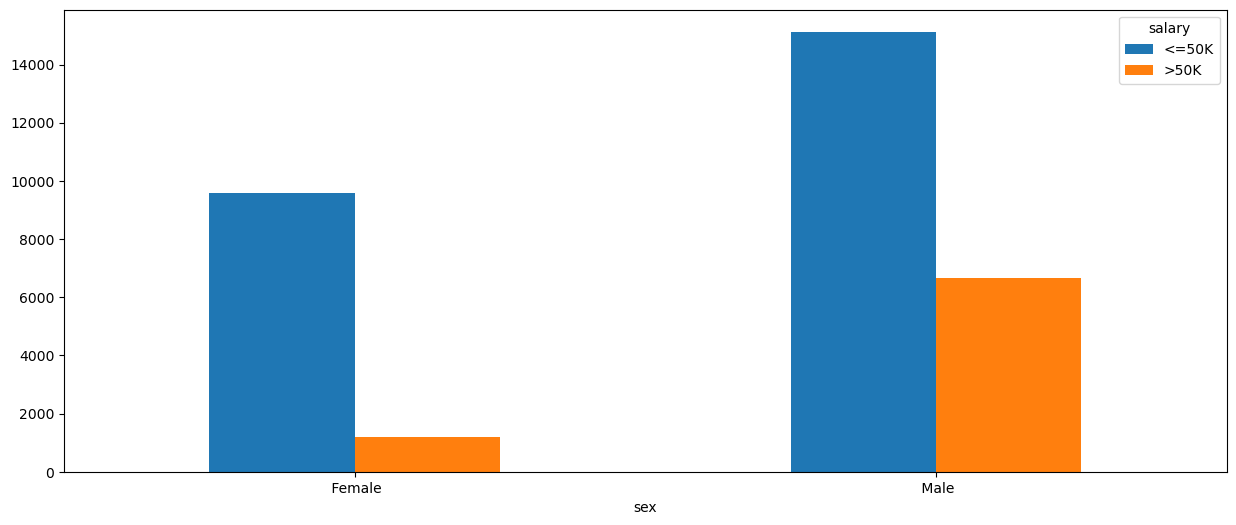

In [37]:
crosstb = pd.crosstab(df.sex, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))

1. Most of the earning populations is male and has 70:30 chance of getting <= or >50k salary.
2. Females have 90:10 chance of getting <= or >50k salary.

    Gender disrimination can clearly be seen.

### 2.2.9 Country & Salary

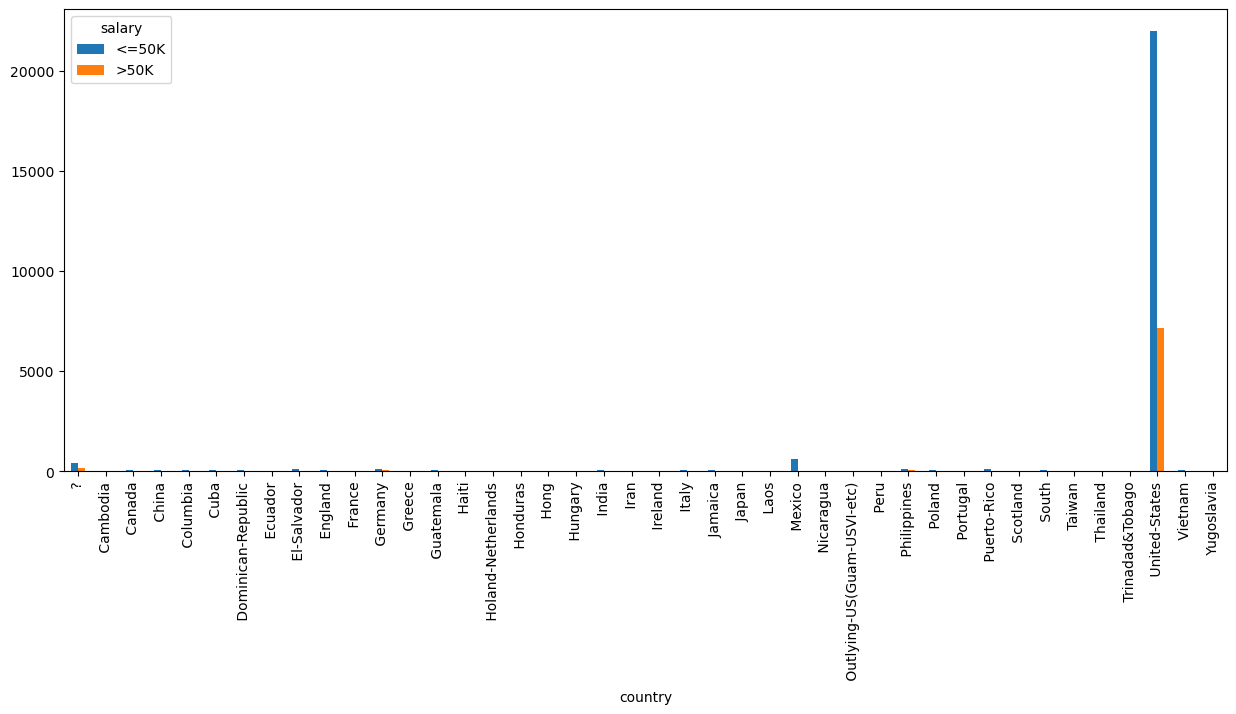

In [10]:
crosstb = pd.crosstab(df.country, df.salary)
barplot = crosstb.plot.bar(rot=0,figsize = (15,6))
plt.xticks(rotation = 90)
plt.show()

The only country having max population is United States where 75:25 is the chance of getting <= or > 50k salary.


### 2.2.10 Hours Per Week & Salary

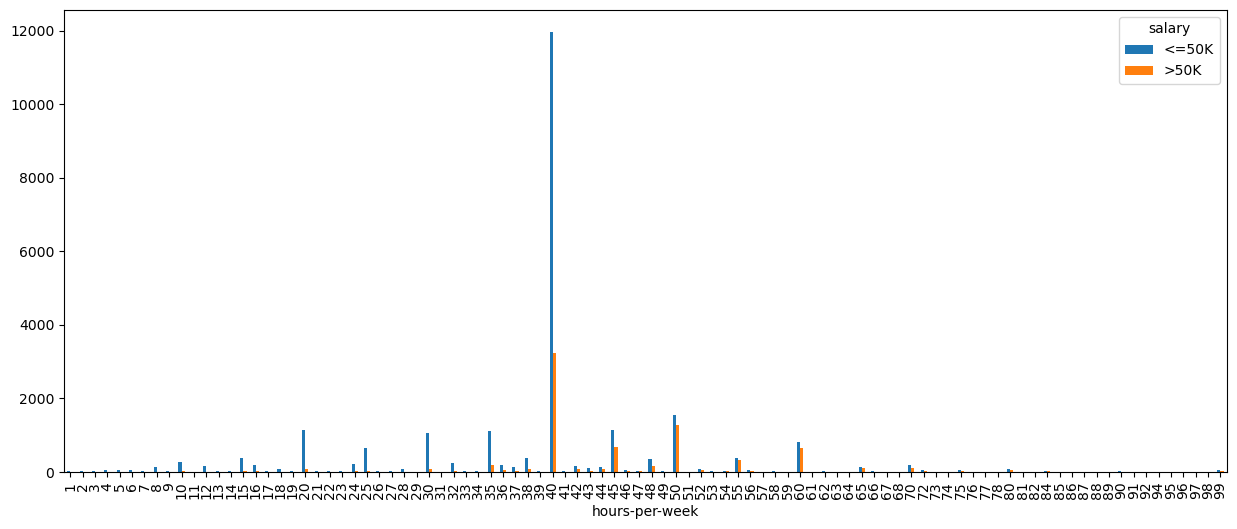

In [11]:
crosstb = pd.crosstab(df["hours-per-week"], df.salary)
barplot = crosstb.plot.bar(rot=0,figsize=(15,6))
plt.xticks(rotation = 90)
plt.show()

Most of the people work for 40 hours per week & have 77:35 chance of getting <= or >50k salary.

### 2.2.11 Education number, Race & Salary

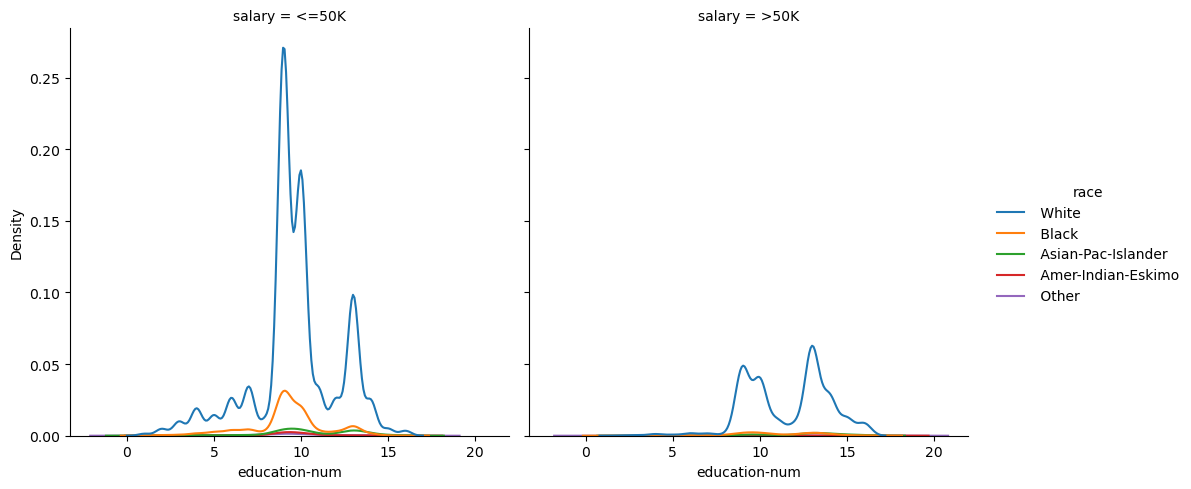

In [12]:
sns.displot(data=df, x=df["education-num"], hue=df["race"], col=df["salary"], kind="kde")

1. Most of the people who are white receive education for around 9 years and get a salary of <=50k.
2. Very few white people seem to get education for around 13 years and receive a salary of >50k.
3. All other races do not get that much education and therefore have lower salary.


### 2.2.12 Hours per week, relationship & Salary

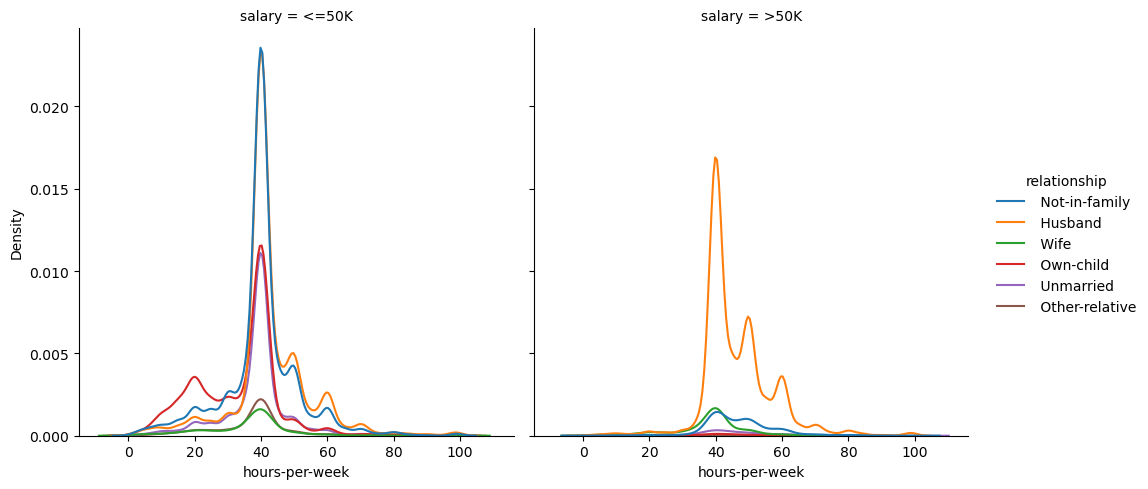

In [13]:
sns.displot(data=df, x=df["hours-per-week"], hue=df["relationship"], col=df["salary"], kind="kde")

1. Most of the people who are not in family work for around 40 hours per week and get a salary of <=50k.
2. People who have a relationship of husband work for around 40 hours per week and receive a salary of >50k.

Summary

For getting salary >50k one must lie in the following categories:

- Age: 40-55
- Workclass: Private/Self-Employed
- Education: Bachelors/Masters
- Marital Status: Married-civ-spouse
- Occupation: Exec-manager
- Relationship: Husband/wife
- Race: White
- Gender: Male
- Country: United States
- Hours per week: >40

## 3. Data Pre-processing
### 3.1 Grouping and encoding all the categorical columns

In [38]:
for dataset in [df]:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 0
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 1
    dataset.loc[dataset['race'] != ' White', 'race'] = 0
    dataset.loc[dataset['race'] == ' White', 'race'] = 1
    dataset.loc[dataset['workclass'] != ' Private', 'workclass'] = 0
    dataset.loc[dataset['workclass'] == ' Private', 'workclass'] = 1
    dataset.loc[dataset['hours-per-week'] <= 40, 'hours-per-week'] = 0
    dataset.loc[dataset['hours-per-week'] > 40, 'hours-per-week'] = 1
for col in df[df.columns]:
    if df[col].dtypes == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df = df.astype(int)
df=df.drop(["education"],axis=1)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,0,77516,13,4,0,1,1,1,2174,0,0,1,0
1,50,0,83311,13,2,3,0,1,1,0,0,0,1,0
2,38,1,215646,9,0,5,1,1,1,0,0,0,1,0
3,53,1,234721,7,2,5,0,0,1,0,0,0,1,0
4,28,1,338409,13,2,9,5,0,0,0,0,0,0,0


We dropped the education column because it is same as education-num.


### 3.2 Plotting graphs for numerical columns

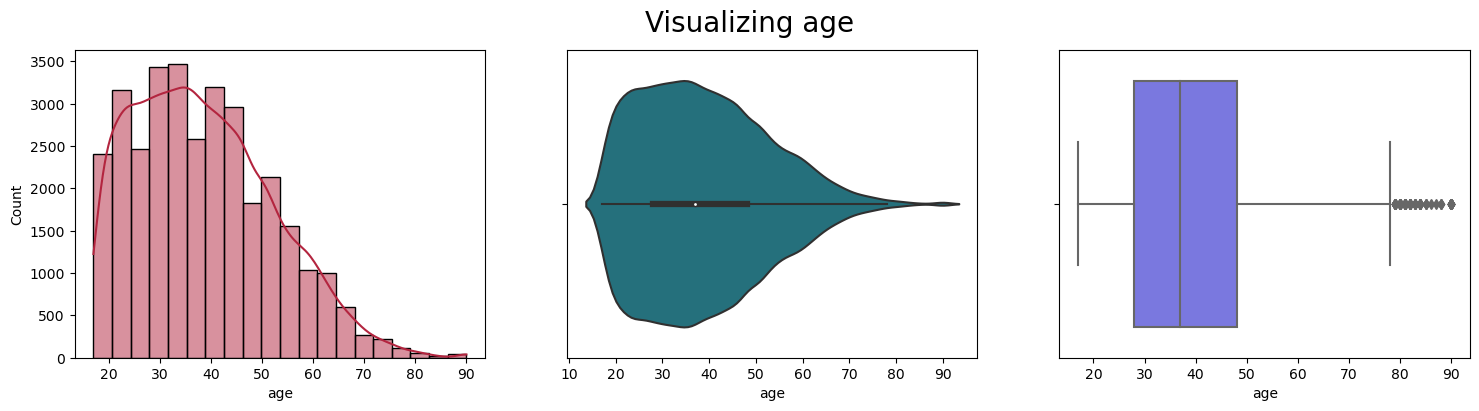

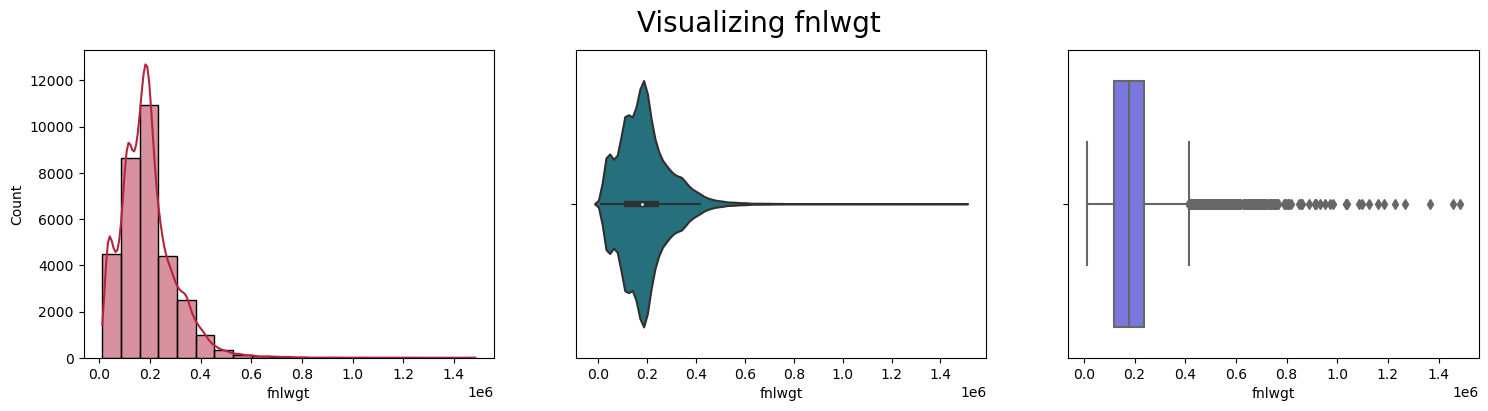

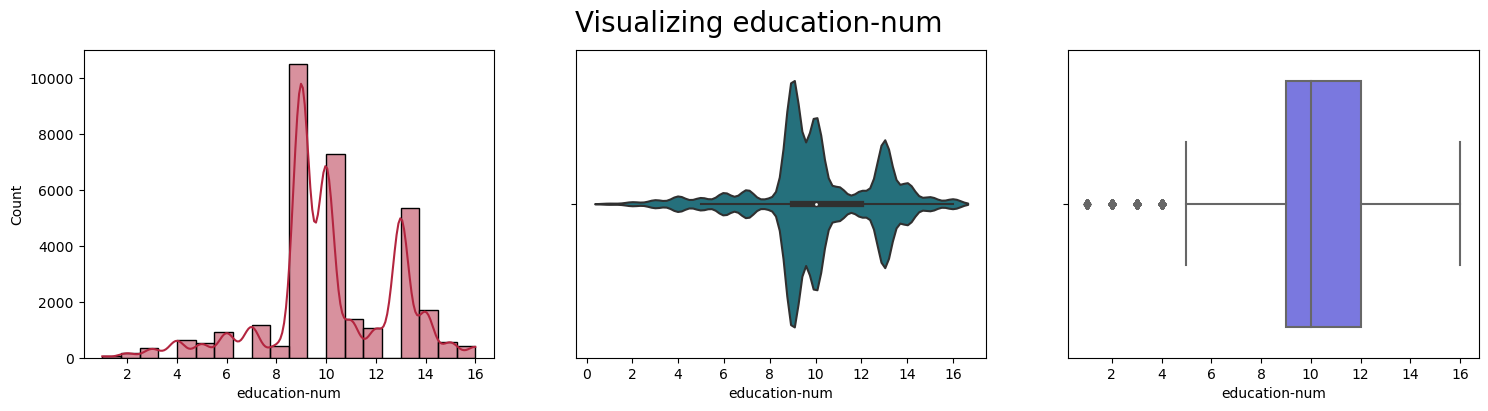

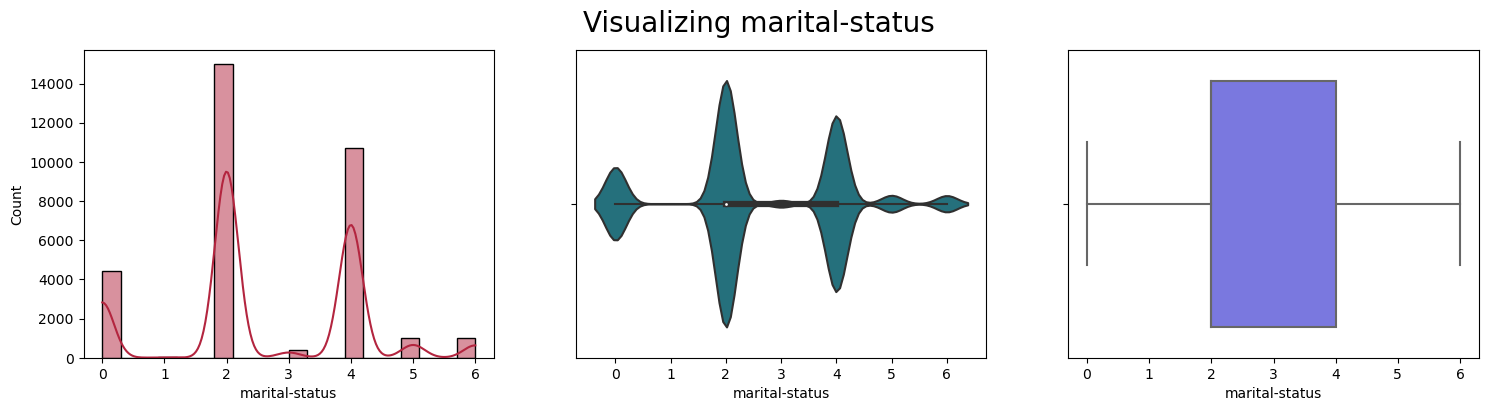

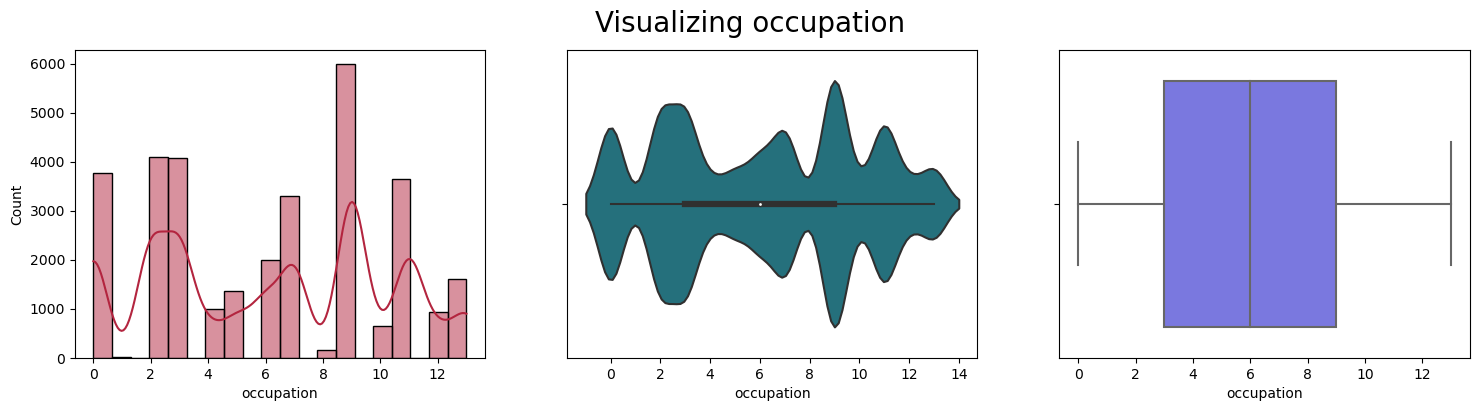

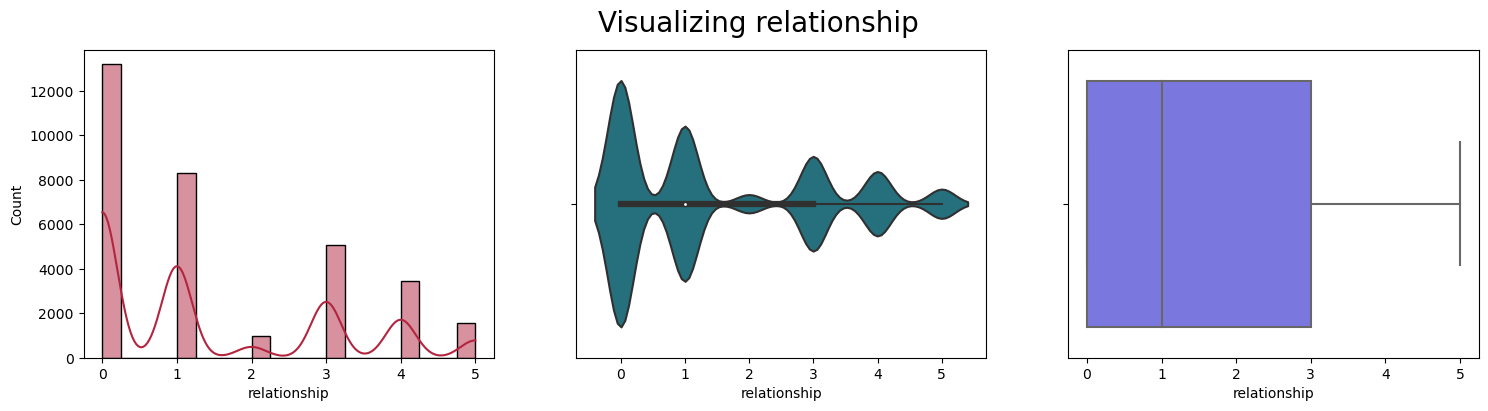

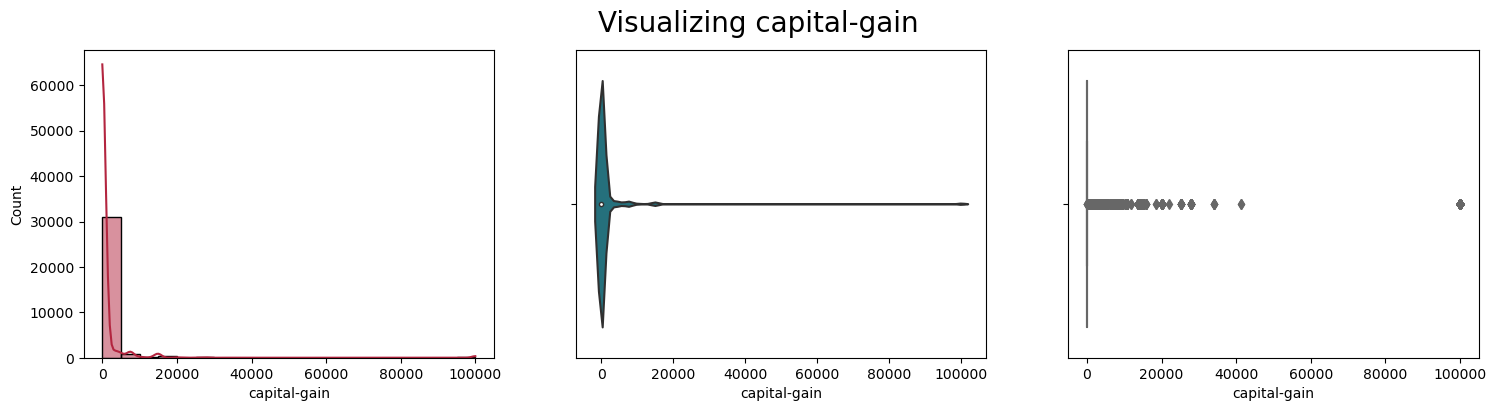

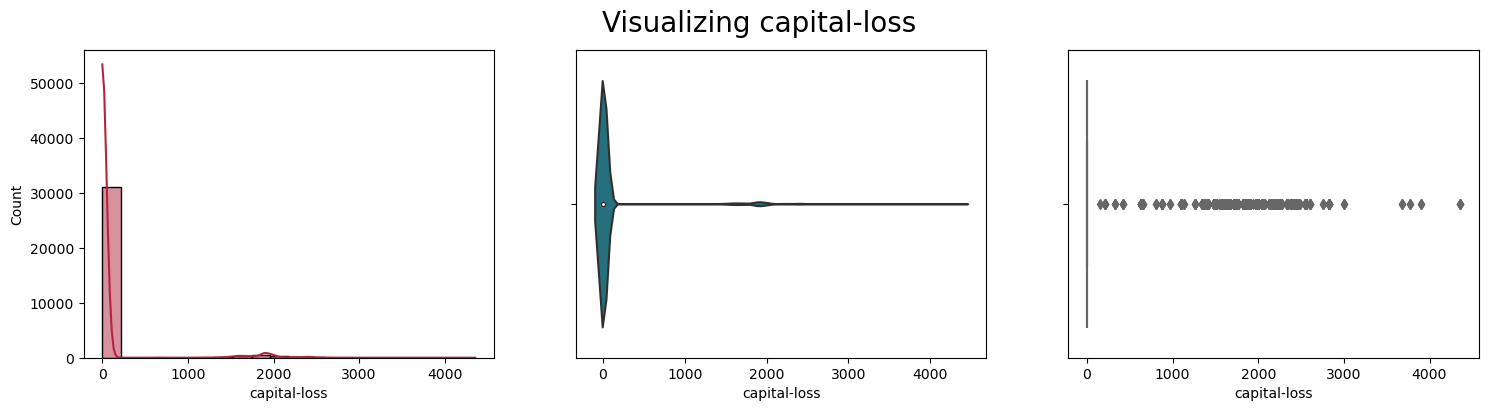

In [39]:
df1=df.drop(["workclass","country","race","sex","salary","hours-per-week"],axis=1)
for i in df1.columns:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df1,x=i,kde=True,bins=20,ax=ax[0],color="#b3253f")
    sns.violinplot(data=df1,x=i,ax=ax[1],color="#177a8a")
    sns.boxplot(data=df1,x=i,ax=ax[2],color="#6967f0")
    plt.suptitle(f'Visualizing {i}',size=20)

Left-Skewed Data:
1. Age
2. Fnlwgt

Outliers:
1. Fnlwgt
2. Education-num
3. Capital-gain
4. Capital-loss

## 4.Model Development and Classification
### 4.1 Data preprocessing


In [40]:
X= df.drop(['salary'],axis=1)
y=df['salary']
y.value_counts(normalize=True)

0    0.75919
1    0.24081
Name: salary, dtype: float64

We need to do sampling to remove bias in training model.


### 4.2 Splitting the dataset

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [46]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))

print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (22792, 13)(22792,)
Test dataset: (9769, 13)(9769,)


### 4.3 Testing the dataset

### 4.3.1 Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(lr.score(X_test, y_test)))


Accuracy on training data: 0.801
Accuracy on test data: 0.797


### 4.3.2 Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
accuracy_score(y_test,prediction2)

0.8027433718906746

In [57]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)

print("Accuracy on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Accuracy on training data: 1.000
Accuracy on test data: 0.848


### 4.3.3 Random Forest Classifier gets selected as it has the maximum accuracy score

In [58]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8477838059166752
----------------------------------------
Confusion Matrix:
[[6856  541]
 [ 946 1426]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7397
           1       0.72      0.60      0.66      2372

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [86]:
#Precision: tp/tp+fp (tp- true positive, fp- false positive)

print('Precision =' , 6856/(6856+946))

Precision = 0.8787490387080236


In [87]:
# recall = tp/tp+fn

print('Recall =', 6856/(6856+541))

Recall = 0.9268622414492361


/Users/rubiyahbiamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


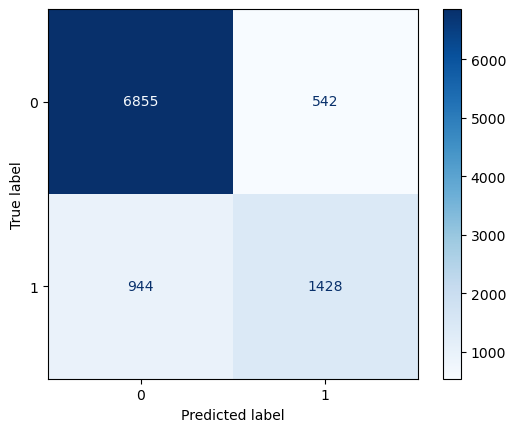

In [59]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 cmap=plt.cm.Blues)

plt.show()


### 5. Summary
We have a model with 85% accuracy score
We did not handle outliers or normalised data because random forest models do not get affected.

# 6. Clustering by KMeans

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv(url, header=None, names=column_names, na_values=" ?", skipinitialspace=True)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [30]:
# Handle missing values
df = df.dropna()

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [31]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [77]:
# Choose the number of clusters (k)
k = 4  # You can experiment with different values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(df_scaled)

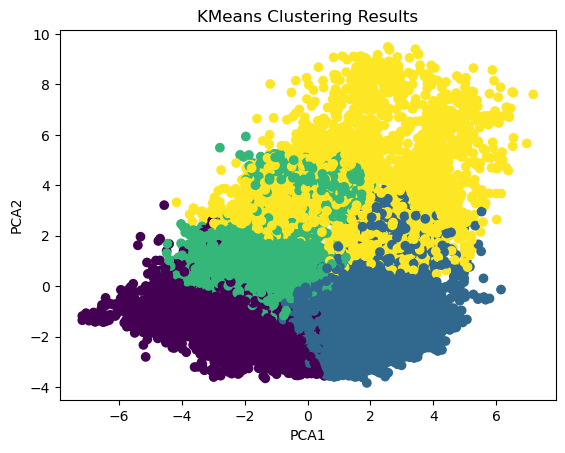

In [78]:
# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)
df["pca1"] = reduced_features[:, 0]
df["pca2"] = reduced_features[:, 1]

# Plot clusters
plt.scatter(df["pca1"], df["pca2"], c=df["cluster"], cmap="viridis")
plt.title("KMeans Clustering Results")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [84]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df["cluster"])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.044477955547544835


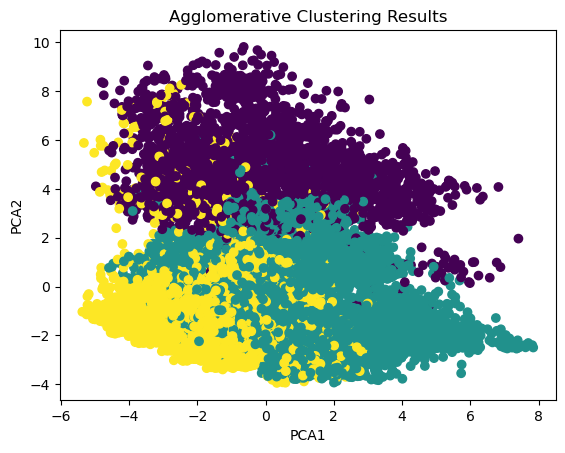

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the dataset (assuming df is your preprocessed dataset)
# ...

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # You can adjust the number of clusters
df['cluster_agg'] = agg_clustering.fit_predict(df_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_scaled)
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

# Plot clusters
plt.scatter(df['pca1'], df['pca2'], c=df['cluster_agg'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df["cluster"])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.06484154418595599
